# Summary Dataframe

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


cinema_weekly_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaWeeklyVisitors.csv', index_col=0)
cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaAge.csv', index_col=0)
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaCapacity.csv', index_col=0)
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaMarketing.csv', index_col=0)
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaOverheads.csv', index_col=0)
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaSpend.csv', index_col=0)



summary_data = pd.DataFrame(index=cinema_weekly_visitors.columns)
summary_data['Age'] = cinema_age.values
summary_data['Capacity'] = cinema_capacity.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Marketing'] = cinema_marketing.values
summary_data['Spend'] = cinema_spend.values

total_weekly_visitors = cinema_weekly_visitors.sum()





summary_data['Total_revenue'] = total_weekly_visitors * summary_data['Spend'] * 52

summary_data['Profit'] = summary_data['Total_revenue'] - summary_data['Overheads'] - summary_data['Marketing']



pd.plotting.register_matplotlib_converters()
cinema_weekly_visitors.index = pd.to_datetime(cinema_weekly_visitors.index)
print(cinema_weekly_visitors.head())






            CCX  ZQL  WVA  BQV  SJE  WBK  YKT  BWF  ACQ  CWN  ...   VPG  RPQ  \
Date                                                          ...              
2019-01-01    0  108  835    0  361  486  168  165  163    0  ...   793  214   
2019-01-08    0  125  854    0  269  340  140  197  168    0  ...  1011  267   
2019-01-15    0  140  889    0  396  496  161  202  165    0  ...   857  348   
2019-01-22    0  113  952    0  419  626  192  141  169    0  ...   932  431   
2019-01-29    0  106  842    0  241  512  169  147  167    0  ...   925  333   

            WKL  TJN   VJV  SDT  BKK  XWO  UDD  XEZ  
Date                                                 
2019-01-01  154  491  1180    0    0  159  341  173  
2019-01-08  113  459   765    0    0  182  353  199  
2019-01-15  122  495  1372    0    0  155  347  179  
2019-01-22  135  480   624    0    0  171  350  168  
2019-01-29  139  480  1048    0    0  141  340  131  

[5 rows x 30 columns]


     Total_revenue  Overheads  Marketing     Profit
CCX       11009284         22          1   11009261
ZQL        7124520         24          1    7124495
WVA      100382568         31          7  100382530
BQV       13447200         57          2   13447141
SJE       76502140         16          7   76502117
WBK       63871392         26         11   63871355
YKT       17711200         79          4   17711117
BWF        9927060         11          2    9927047
ACQ       29031808         23          4   29031781
CWN        6774144         17          1    6774126
ZWY       17026152         61          2   17026089
XQE       18318768         16          4   18318748
JJQ       28241928         15          3   28241910
TVJ       51278188         51          7   51278130
TPY       45579456         82          9   45579365
YBS      194615252         16         24  194615212
UVQ      103987000         61          9  103986930
WQW       26272740         55          4   26272681
YCI       14

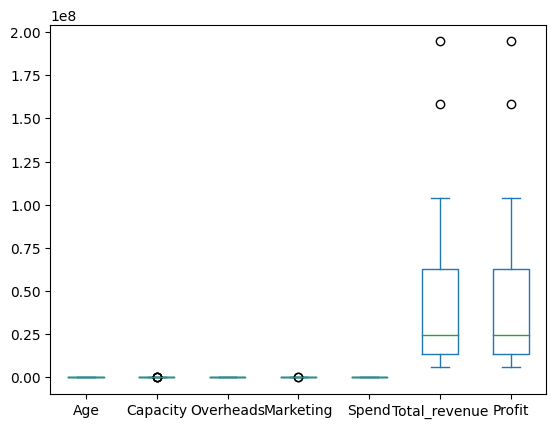

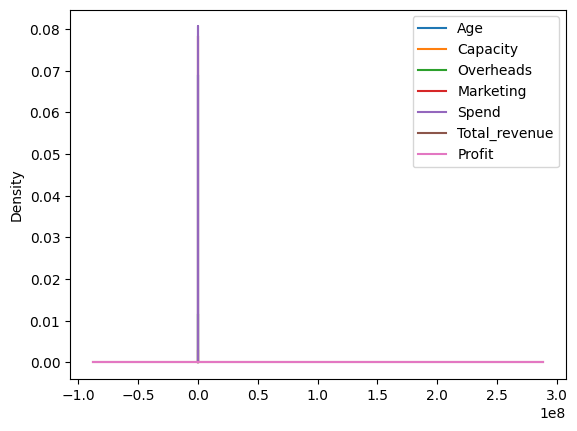

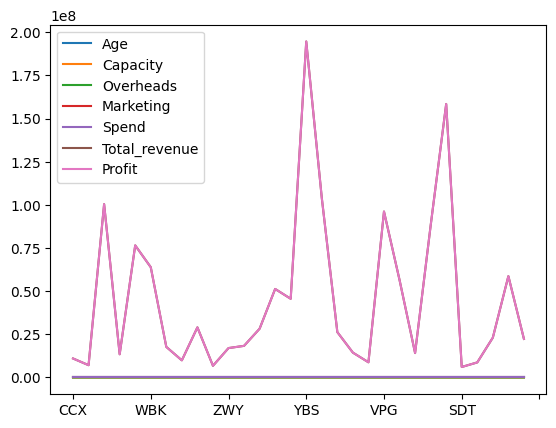

In [2]:
print(summary_data[['Total_revenue', 'Overheads', 'Marketing', 'Profit']])
print(summary_data.shape)
print(summary_data.describe())
print(summary_data.plot.box())
print(summary_data.plot.density())
print(summary_data.plot.line())

# Figure 1-Line Plot Decomposition Quarterly

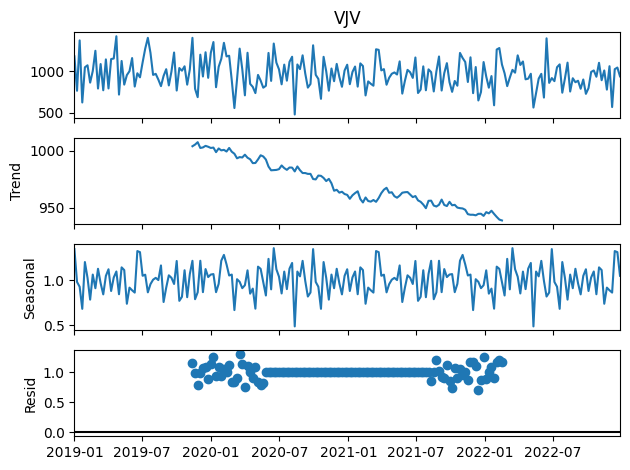

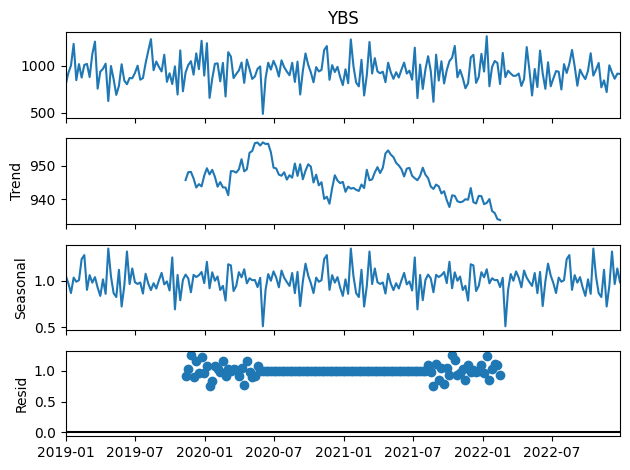

In [3]:

selected = ['VJV', 'YBS']

for name in selected:
    result = seasonal_decompose(cinema_weekly_visitors[name], model='multiplicative', period=91)
    result.plot()
    plt.show()


# Figure 2-Autocorrelation all

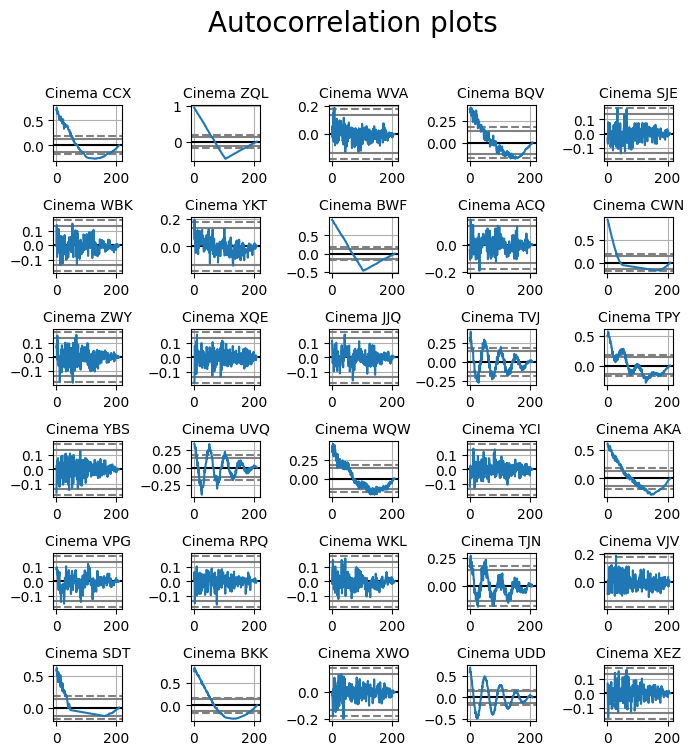

In [4]:

row = 0
col = 0
fig, axes = plt.subplots(figsize=(8, 8), nrows=6, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in cinema_weekly_visitors.columns:
    sub = pd.plotting.autocorrelation_plot(cinema_weekly_visitors[name], axes[row, col])
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


#Figure 3 - Box Plot Low-Very Low

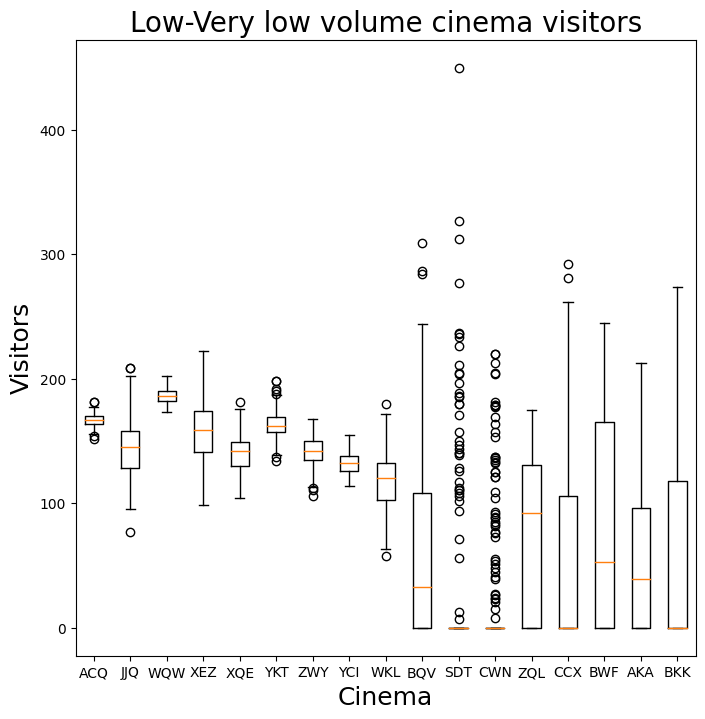

In [5]:
selected = ['ACQ', 'JJQ', 'WQW', 'XEZ', 'XQE', 'YKT', 'ZWY', 'YCI', 'WKL', 'BQV','SDT', 'CWN', 'ZQL', 'CCX', 'BWF', 'AKA', 'BKK']

plt.figure(figsize=(8, 8))
plt.boxplot(cinema_weekly_visitors[selected], labels=selected)
plt.xlabel('Cinema', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('Low-Very low volume cinema visitors', fontsize=20)
plt.show()


#Figure 5- Box Plot High-medium

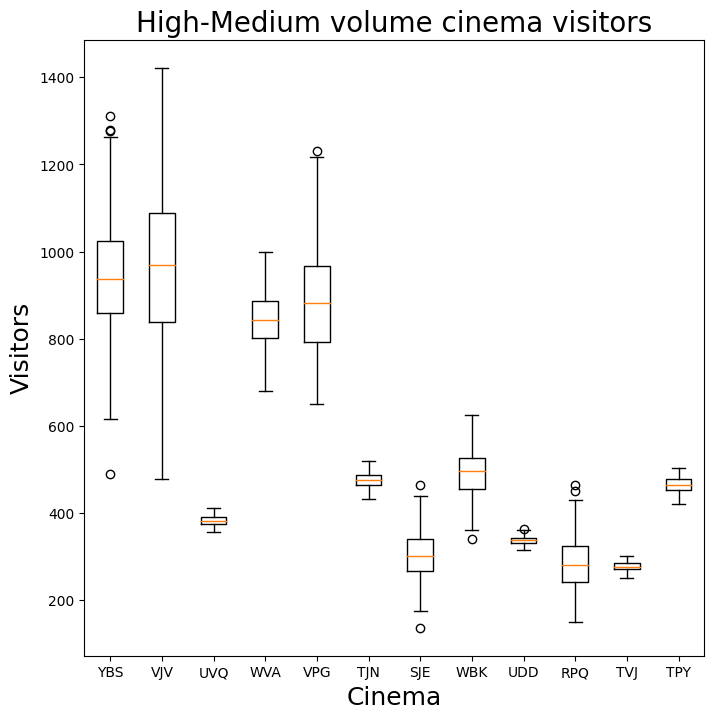

In [6]:
selected =  ['YBS', 'VJV','UVQ', 'WVA', 'VPG', 'TJN', 'SJE' , 'WBK' , 'UDD' , 'RPQ' , 'TVJ' , 'TPY']

plt.figure(figsize=(8, 8))
plt.boxplot(cinema_weekly_visitors[selected], labels=selected)
plt.xlabel('Cinema', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('High-Medium volume cinema visitors', fontsize=20)
plt.show()

# Figure 6-Heatmap

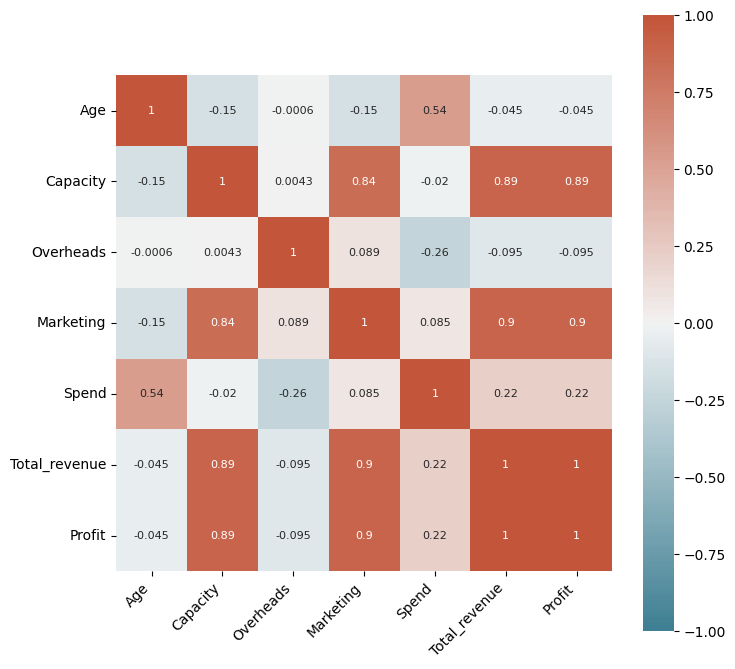

In [7]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Hvplot install

In [2]:
!pip install bokeh
!pip install holoviews

!pip install hvplot
!pip install -q holoviews
import holoviews as hv
!pip install -U bokeh




In [9]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
 

            CCX  ZQL  WVA  BQV  SJE  WBK  YKT  BWF  ACQ  CWN  ...   VPG  RPQ  \
Date                                                          ...              
2019-01-01    0  108  835    0  361  486  168  165  163    0  ...   793  214   
2019-01-08    0  125  854    0  269  340  140  197  168    0  ...  1011  267   
2019-01-15    0  140  889    0  396  496  161  202  165    0  ...   857  348   
2019-01-22    0  113  952    0  419  626  192  141  169    0  ...   932  431   
2019-01-29    0  106  842    0  241  512  169  147  167    0  ...   925  333   

            WKL  TJN   VJV  SDT  BKK  XWO  UDD  XEZ  
Date                                                 
2019-01-01  154  491  1180    0    0  159  341  173  
2019-01-08  113  459   765    0    0  182  353  199  
2019-01-15  122  495  1372    0    0  155  347  179  
2019-01-22  135  480   624    0    0  171  350  168  
2019-01-29  139  480  1048    0    0  141  340  131  

[5 rows x 30 columns]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
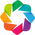

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [4]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

cinema_weekly_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaWeeklyVisitors.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
cinema_weekly_visitors.index = pd.to_datetime(cinema_weekly_visitors.index)
print(cinema_weekly_visitors.head())

plot = cinema_weekly_visitors.hvplot.line(
    frame_height=500, frame_width=500,
    xlabel='Date', ylabel='Visitors',
    title='All Cinemas'
)
hv.extension('bokeh')
plot


# Figure 4-Correlation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
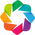

:HeatMap   [columns,index]   (value)

In [5]:
plot = cinema_weekly_visitors.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Cinema correlations',
    rot=90, cmap='seismic'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot



# Figure 8-Time Series

In [6]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

In [7]:
import panel as pn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cinema_weekly_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaWeeklyVisitors.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
cinema_weekly_visitors.index = pd.to_datetime(cinema_weekly_visitors.index)
def get_line_plot(volume, window_size, date_range):
    if volume == 'high':
         selected = ['YBS', 'VJV']
    elif volume == 'medium':
        selected = ['UVQ', 'WVA', 'VPG', 'TJN', 'SJE' , 'WBK' , 'UDD' , 'RPQ' , 'TVJ' , 'TPY']
    elif volume == 'low':
        selected = ['ACQ', 'JJQ', 'WQW', 'XEZ', 'XQE', 'YKT', 'ZWY', 'YCI', 'WKL', 'BQV']
    else:
        selected = ['SDT', 'CWN', 'ZQL', 'CCX', 'BWF', 'AKA', 'BKK']
    df = cinema_weekly_visitors[selected]
    df = df.rolling(window=window_size).mean()
    df = df.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])]
    return df.hvplot.line(frame_width=600, grid=True)

In [8]:
time_title = '## Time-Series'

volumes = ['high', 'medium', 'low', 'very low']

volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(cinema_weekly_visitors.index[0], cinema_weekly_visitors.index[-1]),
                                        start=cinema_weekly_visitors.index[0], end=cinema_weekly_visitors.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    get_line_plot(volume.value, day_avg.value, time_date_range.value)
)

def update_time_row(event):
    time_row[1].object = get_line_plot(volume.value, day_avg.value, time_date_range.value)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', ...], value='high', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2022-12-27 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2022-12-27 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed')

#Figure 7-Variables

In [9]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import panel as pn
import math

In [11]:
pn.extension(comms='colab')
cinema_weekly_visitors = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaWeeklyVisitors.csv', index_col=0)
cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaAge.csv', index_col=0)
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaCapacity.csv', index_col=0)
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaMarketing.csv', index_col=0)
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaOverheads.csv', index_col=0)
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001360077/CinemaSpend.csv', index_col=0)



summary_data = pd.DataFrame(index=cinema_weekly_visitors.columns)
summary_data['Age'] = cinema_age.values
summary_data['Capacity'] = cinema_capacity.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Marketing'] = cinema_marketing.values
summary_data['Spend'] = cinema_spend.values

total_weekly_visitors = cinema_weekly_visitors.sum()




# Calculate total revenue: Weekly visitors * average spend per visitor
summary_data['Total_revenue'] = total_weekly_visitors * summary_data['Spend'] * 52

summary_data['Profit'] = summary_data['Total_revenue'] - summary_data['Overheads'] - summary_data['Marketing']



pd.plotting.register_matplotlib_converters()
cinema_weekly_visitors.index = pd.to_datetime(cinema_weekly_visitors.index)
print(cinema_weekly_visitors.head())
variables = list(summary_data.columns)

            CCX  ZQL  WVA  BQV  SJE  WBK  YKT  BWF  ACQ  CWN  ...   VPG  RPQ  \
Date                                                          ...              
2019-01-01    0  108  835    0  361  486  168  165  163    0  ...   793  214   
2019-01-08    0  125  854    0  269  340  140  197  168    0  ...  1011  267   
2019-01-15    0  140  889    0  396  496  161  202  165    0  ...   857  348   
2019-01-22    0  113  952    0  419  626  192  141  169    0  ...   932  431   
2019-01-29    0  106  842    0  241  512  169  147  167    0  ...   925  333   

            WKL  TJN   VJV  SDT  BKK  XWO  UDD  XEZ  
Date                                                 
2019-01-01  154  491  1180    0    0  159  341  173  
2019-01-08  113  459   765    0    0  182  353  199  
2019-01-15  122  495  1372    0    0  155  347  179  
2019-01-22  135  480   624    0    0  171  350  168  
2019-01-29  139  480  1048    0    0  141  340  131  

[5 rows x 30 columns]


In [12]:
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    summary_data['BubbleSize'] = summary_data[variable_z] / summary_data[variable_z].max() * math.exp(bubble_scaling)
    return summary_data.hvplot.scatter(frame_height=300, frame_width=300,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       x=variable_x, y=variable_y, size='BubbleSize')

In [16]:
variables_title = '## Variables'

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=200)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=200)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=200)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=200)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
)

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['Age', 'Capacity', ...], value='Age', width=200)
        [2] Select(name='Y-axis', options=['Age', 'Capacity', ...], value='Capacity', width=200)
        [3] Select(name='Bubble', options=['Age', 'Capacity', ...], value='Overheads', width=200)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=200)
    [1] HoloViews(Scatter, sizing_mode='fixed')

# Scatter Plot High Volume Correlations

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
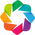

:Scatter   [VJV]   (YBS)

In [14]:
xlimits = (400, 1600)
ylimits = (400, 1600)
plot = cinema_weekly_visitors.hvplot.scatter(
    frame_height=300, frame_width=300,
    x='VJV', y='YBS', xlabel='', ylabel='',
    xlim=xlimits, ylim=ylimits, size=10
)
hv.extension('bokeh')
plot

# Seaborn

In [15]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

NameError: name 'sns' is not defined

# Line Plot All



In [ ]:

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Summary Data ', fontsize=20, position=(0.5, 1.0))
for name in summary_data.columns:
    sub = fig.add_subplot(5, 5, counter)
    sub.set_title('Cinema'+ ' ' + name, fontsize=10)
    sub.plot(summary_data.index, summary_data[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


# Area Plot All

In [ ]:

data = cinema_weekly_visitors.reindex(cinema_weekly_visitors.sum().sort_values(ascending=False).index, axis=1)
print(data.head())

plt.figure(figsize=(8, 8))
plt.stackplot(data.index, data.transpose())
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('Weekly visitors', fontsize=20)
plt.legend(data.columns, loc=2)
plt.show()


In [ ]:
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Product sales distributions', fontsize=20, position=(0.5, 1.0))
for name in summary_data:
    sub = fig.add_subplot(5, 5, counter)
    sub.set_title( name, fontsize=10)
    sub.hist(summary_data[name], edgecolor='w')
    counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


# Sorting By Profit

In [ ]:
import matplotlib.pyplot as plt


sorted_summary_data = summary_data.sort_values(by='Profit')

plt.figure(figsize=(14, 8))
plt.bar(sorted_summary_data.index, sorted_summary_data['Profit'], color='teal')

plt.title('Profit of Cinemas Sorted from Low to High')
plt.xlabel('Cinema')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# High Volume Rolling Average

In [ ]:
period = 7
rolling_average = cinema_weekly_visitors.rolling(window=period).mean()

selected = ['VJV', 'YBS']
print(cinema_weekly_visitors[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(cinema_weekly_visitors[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.plot(rolling_average[selected], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('High Volume Visitors', fontsize=20)
plt.legend(selected, loc=2)
plt.show()


# Medium volume trendline

In [ ]:
selected = ['UVQ', 'WVA', 'VPG', 'TJN', 'SJE' , 'WBK' , 'UDD' , 'RPQ' , 'TVJ' , 'TPY']
print(cinema_weekly_visitors[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(cinema_weekly_visitors[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(cinema_weekly_visitors[name]))
    z = np.polyfit(x, cinema_weekly_visitors[name], 1)
    trend = np.poly1d(z)
    plt.plot(cinema_weekly_visitors.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('Weekly visitors', fontsize=20)
plt.legend(selected, loc=2)
plt.show()


In [ ]:
sample_rate = 'M'  # every month
averaged_cinema_weekly_visitors = cinema_weekly_visitors.resample(sample_rate).mean()
period = 7
rolling_average = cinema_weekly_visitors.rolling(window=period).mean()

selected = ['UVQ', 'WVA', 'VPG', 'TJN', 'SJE' , 'WBK' , 'UDD' , 'RPQ' , 'TVJ' , 'TPY']
print(cinema_weekly_visitors[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(averaged_cinema_weekly_visitors[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(cinema_weekly_visitors[name]))
    z = np.polyfit(x, cinema_weekly_visitors[name], 1)
    trend = np.poly1d(z)
    plt.plot(cinema_weekly_visitors.index, trend(x), linestyle='--')
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units sold', fontsize=18)
plt.title('Medium Volume Monthly Average\n with Linear Trendlines', fontsize=20)
plt.legend(selected, loc=2)
plt.show()
